## Analisis Exploratorio

En esta notebook voy a realizar algunos analisis sobre las variables que fueron extraidas de los items desde la API de Mercadolibre.
Los analisis seran estadisticos y tambien creare visualizaciones que sirvan para ilustrar comparaciones y distintas metricas que sirvan para el negocio.

In [1]:
#Importo las bibliotecas necesarias que se utilizaran en la notebook
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Cargo el archivo CSV
df = pd.read_csv('items_variables.csv', encoding='ISO-8859-1') #tuve que encodearlo en ISO-8859-1 por problemas de compatiblidad con utf-8

#Muestro resumen estadistico de las variables numericas
df.describe()

,price,base_price,original_price,initial_quantity,health
count,2.380000e+02,2.380000e+02,1.00,238.000000,169.000000
mean,2.175752e+05,2.175752e+05,73895.62,542.264706,0.808343
std,1.437583e+06,1.437583e+06,NaN,3075.038240,0.122531
min,4.999000e+03,4.999000e+03,73895.62,1.000000,0.500000
25%,6.739475e+04,6.739475e+04,73895.62,2.000000,0.750000
50%,8.467450e+04,8.467450e+04,73895.62,41.500000,0.810000
75%,1.277138e+05,1.277138e+05,73895.62,168.000000,0.900000
max,2.222222e+07,2.222222e+07,73895.62,38975.000000,1.000000


In [3]:
#filtro los items que tienen "Chromecast", "Apple TV","TV Box","Google Home" o "Amazon Fire TV" en el título
chromecast_items = df[df['title'].str.contains('chromecast', case=False, na=False)]
apple_tv_items = df[df['title'].str.contains('apple tv', case=False, na=False)]
tv_box_items = df[df['title'].str.contains('tv box', case=False, na=False)]
google_home_items = df[df['title'].str.contains('google home', case=False, na=False)]
amazon_fire_tv_items = df[df['title'].str.contains('amazon fire tv', case=False, na=False)]

#calculo las estadisticas descriptivas de precios para cada uno
chromecast_stats = chromecast_items['price'].describe()
apple_tv_stats = apple_tv_items['price'].describe()
tv_box_stats = tv_box_items['price'].describe()
google_home_stats = google_home_items['price'].describe()
amazon_fire_tv_stats = amazon_fire_tv_items['price'].describe()

#muestro las estadisticas descriptivas para cada grupo
print("Estadisticas de precios para Chromecast:")
print(chromecast_stats)
print("\nEstadisticas de precios para Apple TV:")
print(apple_tv_stats)
print("\nEstadisticas de precios para TV Box:")
print(tv_box_stats)
print("\nEstadisticas de precios para Google Home:")
print(google_home_stats)
print("\nEstadisticas de precios para Amazon Fire Tv:")
print(amazon_fire_tv_stats)

#Comparo el rango de precios entre los items
print("\nComparacion de rangos de precios:")
print(f"Rango de Chromecast: {chromecast_stats['min']} - {chromecast_stats['max']}")
print(f"Rango de Apple TV: {apple_tv_stats['min']} - {apple_tv_stats['max']}")
print(f"Rango de TV Box: {tv_box_stats['min']} - {tv_box_stats['max']}")
print(f"Rango de Google Home: {google_home_stats['min']} - {google_home_stats['max']}")
print(f"Rango de Amazon Fire TV: {amazon_fire_tv_stats['min']} - {amazon_fire_tv_stats['max']}")


Estadisticas de precios para Chromecast:
count        25.0000
mean     126232.3680
std       36609.0532
min       69900.0000
25%       99870.0000
50%      129000.0000
75%      139000.0000
max      208999.0000
Name: price, dtype: float64

Estadisticas de precios para Apple TV:
count    4.900000e+01
mean     6.547100e+05
std      3.150618e+06
min      3.000000e+04
25%      6.000000e+04
50%      1.500000e+05
75%      3.700000e+05
max      2.222222e+07
Name: price, dtype: float64

Estadisticas de precios para TV Box:
count        22.000000
mean      83267.363636
std       30263.404801
min       51907.000000
25%       61232.500000
50%       73840.500000
75%       90746.750000
max      167097.000000
Name: price, dtype: float64

Estadisticas de precios para Google Home:
count        43.000000
mean     137505.720930
std      170575.707131
min       10900.000000
25%       61990.000000
50%       79990.000000
75%      129740.000000
max      814644.000000
Name: price, dtype: float64

Estadisticas 

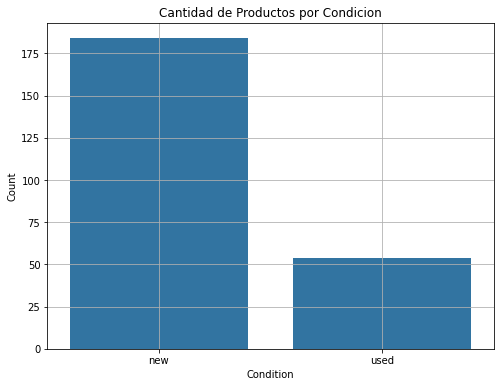

Cantidad de productos por condicion
new     184
used     54
Name: condition, dtype: int64
Proporcion de productos con envio gratuito total
True     80.252101
False    19.747899
Name: free_shipping, dtype: float64


In [4]:
#cantidad total de productos con estado nuevo vs usado
plt.figure(figsize=(8, 6))
sns.countplot(x='condition', data=df)
plt.title('Cantidad de Productos por Condicion')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.grid(True)
plt.show()

#Cuento la cantidad de productos por condicion
condicion_productos = df['condition'].value_counts()
print("Cantidad de productos por condicion")
print(condicion_productos)


#Calculo la proporcion de productos con envio gratuito total (sin importar condicion)
envio_gratuito_proporcion = df['free_shipping'].value_counts(normalize=True) * 100
print("Proporcion de productos con envio gratuito total")
print(envio_gratuito_proporcion)

#Se puede apreciar que la cantidad de productos nuevos publicados es practicamente el triple que los productos usados

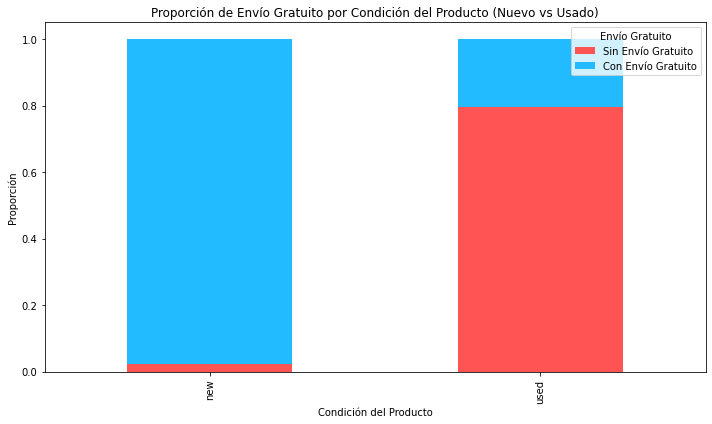

In [65]:
#Comparo tipo de envio segun la condicion del item

#filtrar solo los productos que tienen la columna 'free_shipping' como True o False
df_filtered = df[df['free_shipping'].notnull() & df['condition'].notnull()]

#creo una tabla cross para contar productos por condicion y si tienen envio gratuito o no
shipping_condition = pd.crosstab(df_filtered['condition'], df_filtered['free_shipping'], normalize='index')

#renombro las columnas para que sea mas claro
shipping_condition.columns = ['Sin Envío Gratuito', 'Con Envío Gratuito']

#creo grafico de barras apiladas
shipping_condition.plot(kind='bar', stacked=True, color=['#FF5454', '#22BBFF'], figsize=(10, 6))

#agrego los titulos y leyendas
plt.title('Proporción de Envío Gratuito por Condición del Producto (Nuevo vs Usado)')
plt.xlabel('Condición del Producto')
plt.ylabel('Proporción')
plt.legend(loc='upper right', title='Envío Gratuito')

#muestro el grafico
plt.tight_layout()
plt.show()

#De la visualizacion se deduce que practicamente todos los productos nuevos tienen envio gratuito pero los productos
#usados en su gran mayoria poseen envios que no son gratuitos.

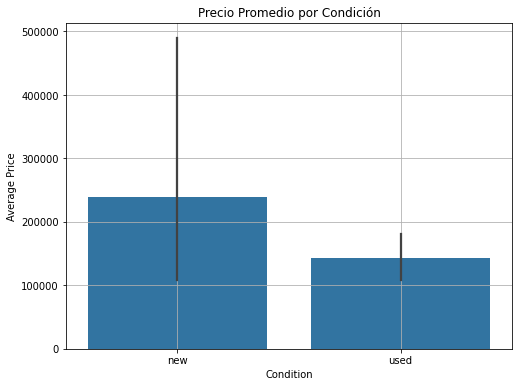

,count,mean,std,min,25%,50%,75%,max
condition,,,,,,,,
new,184.0,239545.574348,1.633502e+06,4999.0,69999.0000,85492.5,120749.0,22222222.0
used,54.0,142713.314259,1.440203e+05,30000.0,59249.7425,75000.0,168750.0,720000.0


In [55]:
#precio promedio de productos nuevos vs usados
plt.figure(figsize=(8, 6))
sns.barplot(x='condition', y='price', data=df)
plt.title('Precio Promedio por Condición')
plt.xlabel('Condition')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

df.groupby('condition')['price'].describe()

#Como era de esperarse, en general, el precio de los productos nuevos es mas elevado que el precio de los productos usados

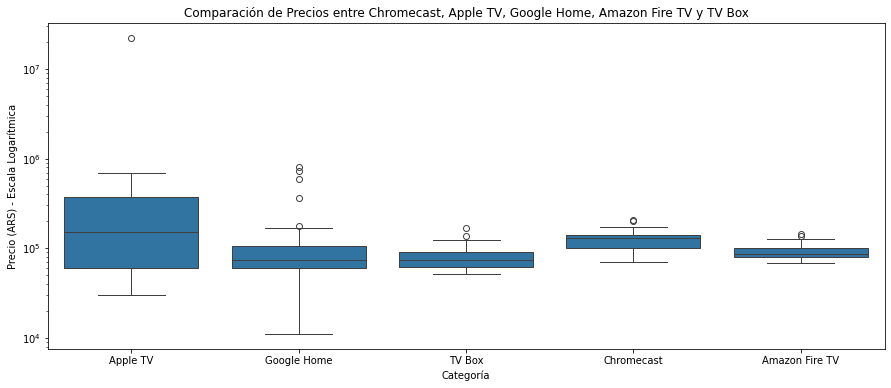

In [67]:
#Comparacion de precio entre productos sin importar condicion
#busco los distintos productos que me interesa comparar para el boxplot
items_filtered = df[df['title'].str.contains('chromecast|apple tv|tv box|google home|amazon fire tv', case=False, na=False)].copy()

#le asigno una categoria a cada producto (elijo su mismo nombre para que no haya confusiones)
items_filtered['category'] = items_filtered['title'].apply(
    lambda x: 'Chromecast' if 'chromecast' in x.lower() else ('Apple TV' if 'apple tv' in x.lower() else ('Google Home' if 'google home' in x.lower() else ('Amazon Fire TV' if 'amazon fire tv' in x.lower() else 'TV Box')
)))

#creo que el boxplot
plt.figure(figsize=(15, 6))
sns.boxplot(x='category', y='price', data=items_filtered)
plt.yscale('log')  #aplico escala logaritmica al eje Y porque sino no se visualiza bien
plt.title('Comparación de Precios entre Chromecast, Apple TV, Google Home, Amazon Fire TV y TV Box')
plt.xlabel('Categoría')
plt.ylabel('Precio (ARS) - Escala Logarítmica')
plt.show()

#Hay mucha variedad de precios en los productos Apple TV pero se puede ver que tienden a ser los que tienen precios mas caros
#Los productos google home tiene varios outliers pero el rango de precios esta mas comprimido
#Los chromecast son los segundos productos mas caros, por detras de los apple tv
#Los TV Box suelen ser los productos mas baratos en esta comparacion
#Los Amazon Fire Tv sticks no varian muchos sus precios en general y poseen muy pocos outliers

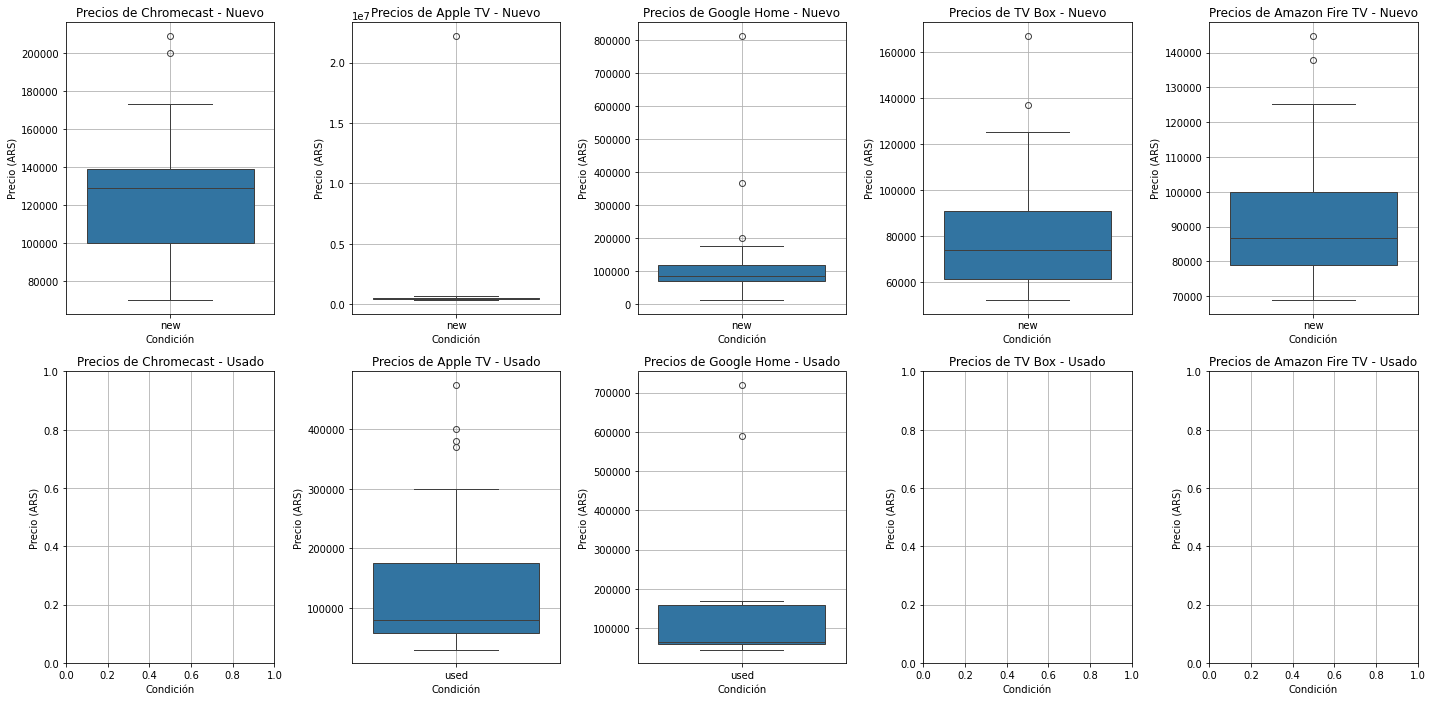

In [68]:
#Comparacion de precio entre productos teniendo en cuenta su condicion

#pongo en una lista los productos a comparar para luego poder iterarlos
productos = ['Chromecast', 'Apple TV', 'Google Home', 'TV Box', 'Amazon Fire TV']

#creo la figura y los subplots (2 filas, 5 columnas para 10 graficos en total)
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))

#itero sobre la lista de productos para generar los graficos
for i, producto in enumerate(productos):
    # Filtrar los productos por nombre
    items = df[df['title'].str.contains(producto, case=False, na=False)]
    
    #filtro por condicion
    nuevo_items = items[items['condition'] == 'new']
    usado_items = items[items['condition'] == 'used']
    
    #Grafico superior: Precios de los productos con condicion nuevo
    sns.boxplot(x='condition', y='price', data=nuevo_items, ax=axes[0, i])
    axes[0, i].set_title(f'Precios de {producto} - Nuevo')
    axes[0, i].set_xlabel('Condición')
    axes[0, i].set_ylabel('Precio (ARS)')
    axes[0, i].grid(True)
    
    #Grafico inferior: Precios de los productos con condicion usado
    sns.boxplot(x='condition', y='price', data=usado_items, ax=axes[1, i])
    axes[1, i].set_title(f'Precios de {producto} - Usado')
    axes[1, i].set_xlabel('Condición')
    axes[1, i].set_ylabel('Precio (ARS)')
    axes[1, i].grid(True)

plt.tight_layout()

plt.show()

#En los graficos se pueden apreciar varias cosas:
#-Los productos Chromecast no cuentan con publicaciones con condicion de usado
#-Los productos Apple TV cuentan con la gran mayoria de publicaciones con condicion usado y los que tienen condicion de nuevo
#son mas caros que los usados por amplio margen
#-Los productos Google Home en condicion usado suelen ser mucho mas baratos que los nuevos pero hay excepciones.
#-No hay productos en condicion usada de TV Box y Amazon Fire TV
#-Por lo que se puede apreciar los productos mas caros suelen ser los Apple TV y algunos modelos de Chromecast

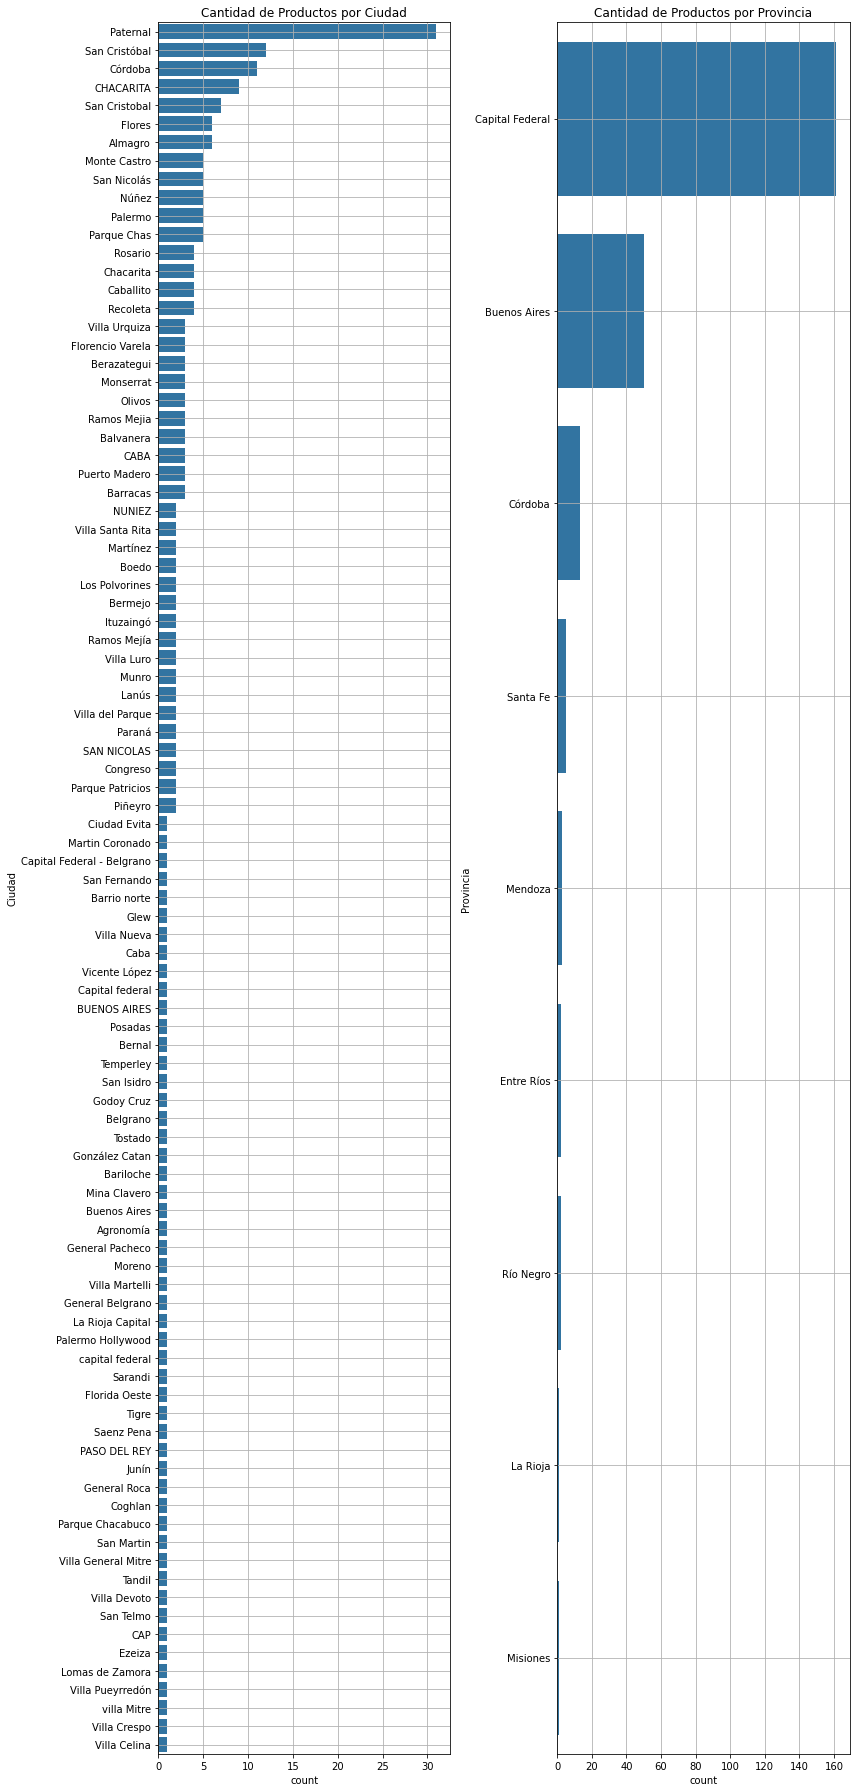

Capital Federal    161
Buenos Aires        50
Córdoba             13
Santa Fe             5
Mendoza              3
Entre Ríos           2
Río Negro            2
La Rioja             1
Misiones             1
Name: state_name, dtype: int64


In [72]:
#Productos por ciudad y provincia
#creo la figura y los subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 25))

#Grafico 1: Cantidad de productos por ciudad
sns.countplot(y='city_name', data=df, order=df['city_name'].value_counts().index, ax=axes[0])
axes[0].set_title('Cantidad de Productos por Ciudad')
axes[0].set_ylabel('Ciudad')
axes[0].grid(True)

#Grafico 2: Cantidad de productos por provincia
sns.countplot(y='state_name', data=df, order=df['state_name'].value_counts().index, ax=axes[1])
axes[1].set_title('Cantidad de Productos por Provincia')
axes[1].set_ylabel('Provincia')
axes[1].grid(True)


plt.tight_layout()
plt.show()

#cuento cuantos productos provienen de cada provincia (no lo hago para ciudades porque son muchas)
productos_por_provincia = df['state_name'].value_counts()
print(productos_por_provincia)

#En los graficos se puede ver que las ciudades que mas productos publicaron son Paternal, San Cristobal y Cordoba.
#Tambien se puede apreciar que en Capital Federal y Buenos Aires se realizaron la mayor cantidad de publicaciones, este dato
#puede ser interesante para ofrecer algun tipo de promocion a la hora de realizar ventas en dichos lugares (por ejemplo ofreciendo 
#menos intereses por venta) para incentivar a que crezcan aun mas la cantidad de publicaciones en dichos lugares ya que se 
#sabe que son las que tienen mas actividad en cuanto a creacion de publicaciones de productos.

Correlacion entre health y days_since_update: -0.3651152193912875


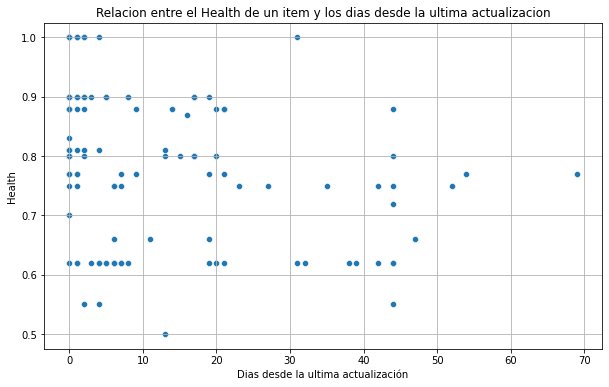

In [75]:
#Relacion de salud de las publicaciones con la cantidad de dias que tiene sin haber sido actualizada
from datetime import datetime
import pytz  # Biblioteca para manejar zonas horarias

#Me aseguro de que 'last_updated' esté en formato datetime con la zona horaria correcta (UTC) (tuve que hacer esto porque me tiraba un error de formato al querer restar las fechas)
df['last_updated'] = pd.to_datetime(df['last_updated'], errors='coerce', utc=True)

#obtengo la fecha actual en UTC para calcular cuántos días han pasado desde la ultima actualización
fecha_actual = pd.Timestamp(datetime.now(), tz=pytz.UTC)

#calculao la cantidad de dias que pasaron desde la ultima actualizacion
df['days_since_update'] = (fecha_actual - df['last_updated']).dt.days

#compruebo si hay filas con valores nulos y los dropeo
df_clean = df[['health', 'days_since_update']].dropna()

#calculo la correlacion entre health y days_since_update para ver si puedo llegar a alguna conclusion
correlation = df_clean['health'].corr(df_clean['days_since_update'])
print(f'Correlacion entre health y days_since_update: {correlation}')

#creo un grafico de dispersion para visualizar la relacion
plt.figure(figsize=(10, 6))
sns.scatterplot(x='days_since_update', y='health', data=df_clean)
plt.title('Relacion entre el Health de un item y los dias desde la ultima actualizacion')
plt.xlabel('Dias desde la ultima actualizacion')
plt.ylabel('Health')
plt.grid(True)
plt.show()

#Queria chequear si la salud de la publicacion (health) de un item estaba relacionada con la cantidad de dias que pasaron desde su 
#ultima actualizacion, pero por lo que puedo apreciar no veo ningun patron que evidencie esto.

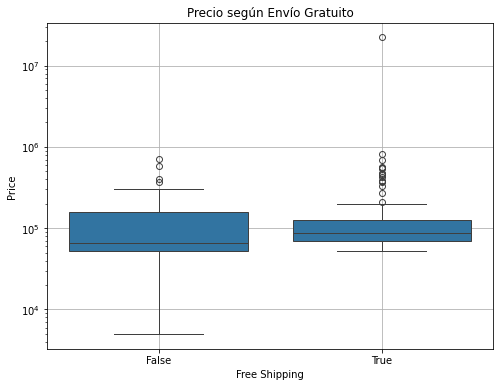

,count,mean,std,min,25%,50%,75%,max
free_shipping,,,,,,,,
False,47.0,125728.276170,1.438288e+05,4999.0,52000.0,65000.0,159999.5,720000.0
True,191.0,240176.312408,1.603203e+06,51907.0,69999.0,86799.0,125099.5,22222222.0


In [56]:
#Modalidades de envio y precio
plt.figure(figsize=(8, 6))
sns.boxplot(x='free_shipping', y='price', data=df)
plt.title('Precio segun Envio Gratuito')
plt.xlabel('Free Shipping')
plt.yscale('log')
plt.ylabel('Price')
plt.grid(True)
plt.show()

df.groupby('free_shipping')['price'].describe()

#los productos con envio gratuito suelen ser mas caros, como era previsto

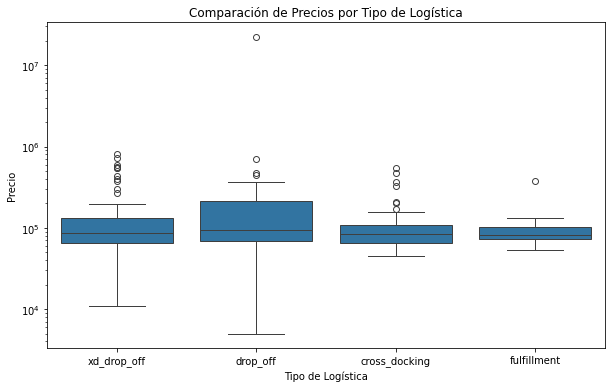

Cantidad de productos por tipo de logistica
xd_drop_off      109
cross_docking     81
drop_off          27
fulfillment       21
Name: logistic_type, dtype: int64


,count,mean,std,min,25%,50%,75%,max
logistic_type,,,,,,,,
cross_docking,81.0,105786.851852,8.327360e+04,44990.0,64999.0,83464.0,107099.0,550999.0
drop_off,27.0,984726.221852,4.247383e+06,4999.0,68580.0,94999.0,215000.0,22222222.0
fulfillment,21.0,99078.152381,6.669737e+04,53999.0,72369.2,80999.0,101999.0,379990.0
xd_drop_off,109.0,133448.811560,1.406356e+05,10900.0,65000.0,86799.0,132338.0,814644.0


In [71]:
#Comparacion de precios por tipo de logistica
plt.figure(figsize=(10, 6))
sns.boxplot(x='logistic_type', y='price', data=df)
plt.title('Comparación de Precios por Tipo de Logística')
plt.ylabel('Precio')
plt.yscale('log')
plt.xlabel('Tipo de Logística')
plt.show()

#cuento cuantos productos tienen cada tipo de modo de envio
envio_mod = df['logistic_type'].value_counts()
print("Cantidad de productos por tipo de logistica")
print(envio_mod)

df.groupby('logistic_type')['price'].describe()

#los productos con tipos de logistica drop_off suelen ser los mas caros (igualmente el promedio se ve muy afectado
#por un outlier con precio de 22222222)
#Los productos con tipos de logistica xd_drop_off son los segundos mas caros
#Los productos con tipos de logistica cross_docking y fulfillment tienen precios  muy similares (y mas baratos) pero 
#tambien son los que cuentan con menor cantidad de productos

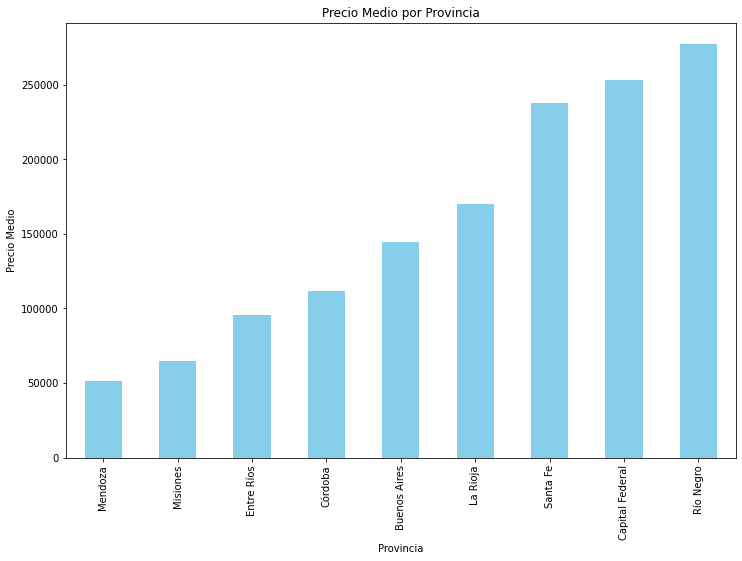

In [73]:
#agrupacion por provincia y cálculo del precio medio
precio_provincia = df.groupby('state_name')['price'].mean().sort_values()

#hago un grafico de barras para comparar precios medios por provincia
plt.figure(figsize=(12, 8))
precio_provincia.plot(kind='bar', color='skyblue')
plt.title('Precio Medio por Provincia')
plt.ylabel('Precio Medio')
plt.xlabel('Provincia')
plt.show()

#Se aprecia que el precio promedio de los items en la provincia de Rio Negro es el mas alto, seguido por capital federal
#y luego Santa Fe

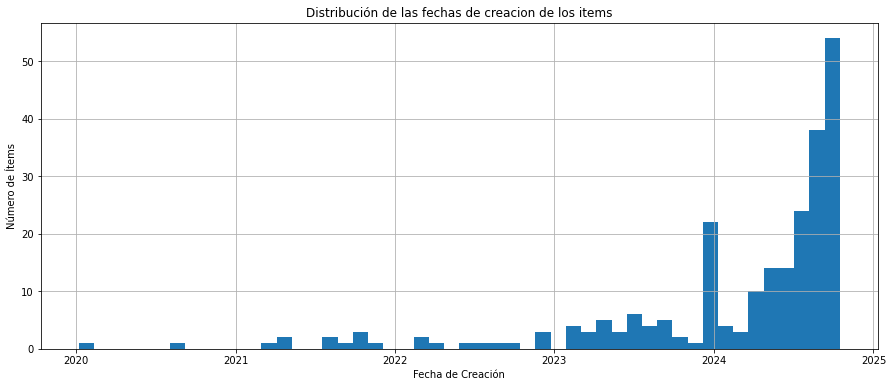

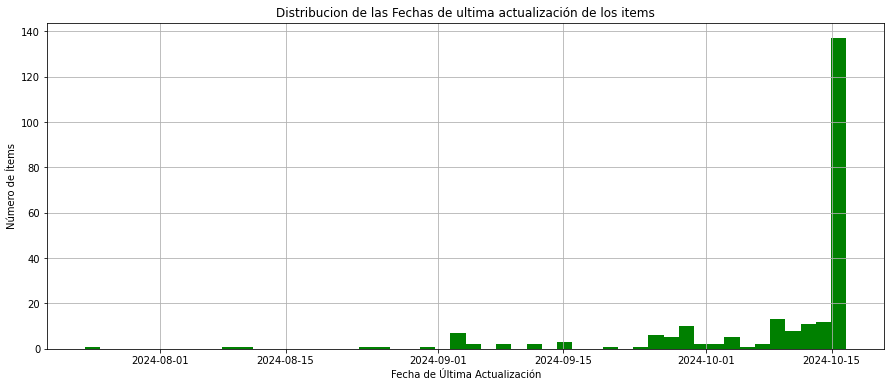

In [83]:
#Distribucion temporal para ver fechas de creacion de publicaciones contra fechas de ultima actualizacion
#convierto las fechas a formato datetime
df['date_created'] = pd.to_datetime(df['date_created'])
df['last_updated'] = pd.to_datetime(df['last_updated'])

#hago un histograma de fechas de creacion
plt.figure(figsize=(15, 6))
df['date_created'].hist(bins=50)
plt.title('Distribución de las fechas de creacion de los items')
plt.xlabel('Fecha de Creación')
plt.ylabel('Número de Ítems')
plt.show()

#hago un histograma de fechas de ultima actualizacion
plt.figure(figsize=(15, 6))
df['last_updated'].hist(bins=50, color='green')
plt.title('Distribucion de las Fechas de ultima actualización de los items')
plt.xlabel('Fecha de Última Actualización')
plt.ylabel('Número de Ítems')
plt.show()

#se aprecia que la gran mayoria de las publicaciones de los productos fueron actualizadas recientemente
#tambien se puede ver que la mayor cantidad de las publicaciones fueron creadas en el Q2,Q3 y comienzos del Q4 del 2024,
#pero en los comienzos del Q4 del 2024 fue el periodo en donde mas publicaciones de items se crearon.